In [1]:
# !pip install sklearn
# !pip install matplotlib
# !pip install pandas
# !pip install numpy

In [2]:
import numpy as np
import sklearn
import pandas as pd
import matplotlib
import matplotlib.pylab as plt
from sklearn.ensemble import IsolationForest
from sklearn import preprocessing
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 10,6

In [3]:
df = pd.read_csv("combined.csv",skiprows=1)
df['datetime'] = pd.to_datetime(df['date'],infer_datetime_format="%Y-%m-%d %H:%M:%S")
df = df.set_index('datetime')
df.drop(['date'], axis=1, inplace=True)
df["date"] = df.index.date
df.drop('timestamp',axis=1);
df.head()
#for per day data set use #df = df.resample('D').mean()
#df = df.resample('D').mean()

,temperature,humidity,rain,pressure,windspeed,signal,timestamp,date
datetime,,,,,,,,
2018-12-31 03:35:20,20.2,66,0,92839,3.7,27,1546227320904,2018-12-31
2018-12-31 03:41:17,20.5,65,0,92837,1.7,27,1546227677750,2018-12-31
2018-12-31 03:47:14,20.6,63,0,92830,6.6,27,1546228034809,2018-12-31
2018-12-31 03:53:11,20.8,62,0,92833,3.3,27,1546228391798,2018-12-31
2018-12-31 03:59:08,21.1,61,0,92841,3.2,27,1546228748671,2018-12-31


In [4]:
#indexing datetime
df.index = pd.to_datetime(df.index)
df.drop('timestamp',axis=1);

In [5]:
# #plotting individual data with respect to time remove comment to visuilize.

# plt.plot_date(matplotlib.dates.date2num(df.date), df.signal, fmt='o', xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');
# plt.plot_date(matplotlib.dates.date2num(df.date), df.temperature, fmt='o', xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');
# plt.plot_date(matplotlib.dates.date2num(df.date), df.rain, fmt='o', xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');
# plt.plot_date(matplotlib.dates.date2num(df.date), df.humidity, fmt='o',xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');
# plt.plot_date(matplotlib.dates.date2num(df.date), df.pressure, fmt='o',xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');
# plt.plot_date(matplotlib.dates.date2num(df.date), df.windspeed, fmt='o', tz=None, xdate=True, ydate=False,marker='o',linewidth=0.1, markersize=4);
# plt.xticks(rotation='vertical');

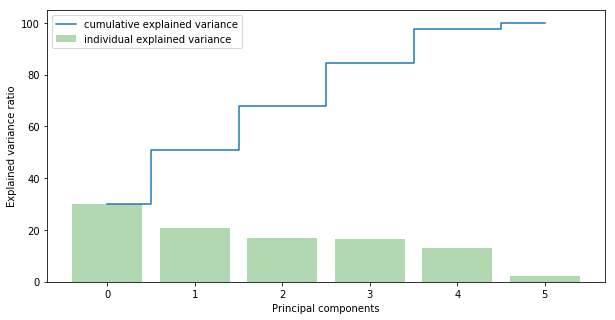

In [6]:
#Finding Number of components to keep
data = df[['temperature','humidity','rain','pressure','windspeed','signal']]
X = data.values
X_std = scaler = preprocessing.StandardScaler(copy=True, with_mean=True, with_std=True).fit_transform(X)
mean_vec = np.mean(X_std, axis=0)
cov_mat = np.cov(X_std.T)
eig_vals, eig_vecs = np.linalg.eig(cov_mat)
eig_pairs = [ (np.abs(eig_vals[i]),eig_vecs[:,i]) for i in range(len(eig_vals))]
eig_pairs.sort(key = lambda x: x[0], reverse= True)
tot = sum(eig_vals)
var_exp = [(i/tot)*100 for i in sorted(eig_vals, reverse=True)] # Individual explained variance
cum_var_exp = np.cumsum(var_exp) # Cumulative explained variance

plt.figure(figsize=(10, 5))
plt.bar(range(len(var_exp)), var_exp, alpha=0.3, align='center', label='individual explained variance', color = 'g')
plt.step(range(len(cum_var_exp)), cum_var_exp, where='mid',label='cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal components')
plt.legend(loc='best')
plt.show();

In [7]:
# Droppin signal, i.e; contributes less to variation
data = df[['temperature','humidity','rain','pressure','windspeed']]

/home/richguy142/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:223: FutureWarning: behaviour="old" is deprecated and will be removed in version 0.22. Please use behaviour="new", which makes the decision_function change to match other anomaly detection algorithm API.
  FutureWarning)
/home/richguy142/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/iforest.py:417: DeprecationWarning: threshold_ attribute is deprecated in 0.20 and will be removed in 0.22.
  " be removed in 0.22.", DeprecationWarning)
/home/richguy142/anaconda3/lib/python3.7/site-packages/pandas/plotting/_converter.py:129: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.

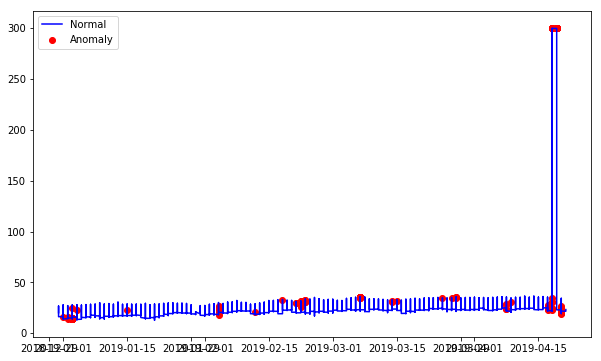

In [8]:
#Using IsolationForest algorithm to find anamolys
model =  IsolationForest(n_estimators=2000 ,contamination=0.005)
model.fit(data)
df['anomaly2'] = model.predict(data)

# visualization
fig, ax = plt.subplots(figsize=(10,6))

a = df.loc[df['anomaly2'] == -1, ['date', 'temperature']] #anomaly

ax.plot(df['date'], df['temperature'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['temperature'], color='red', label = 'Anomaly',marker='o')
plt.legend()
plt.show();

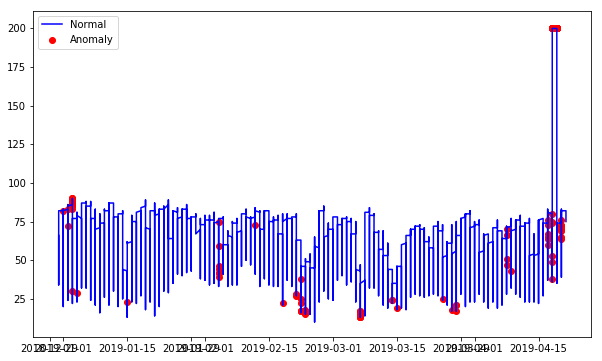

In [9]:
#Plotting wrt humidity and can be similarly plotted for all variables
fig, ax = plt.subplots(figsize=(10,6))
a = df.loc[df['anomaly2'] == -1, ['date', 'humidity']] #anomaly

ax.plot(df['date'], df['humidity'], color='blue', label = 'Normal')
ax.scatter(a['date'],a['humidity'], color='red', label = 'Anomaly',marker='o')
plt.legend()
plt.show();

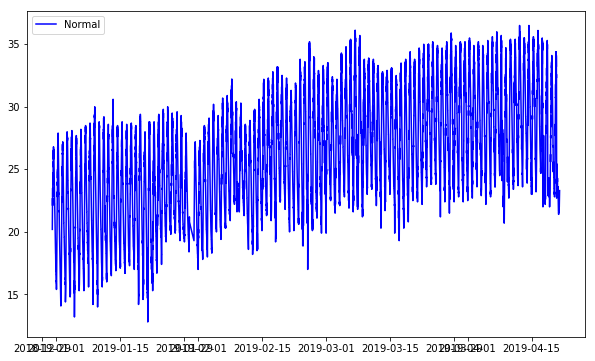

In [10]:
#Removing the anamolys and plotting again
data = data[df['anomaly2'] == 1]
fig, ax = plt.subplots(figsize=(10,6))

ax.plot(data.index, data['temperature'], color='blue', label = 'Normal')
plt.legend()
plt.show();